<h1 align="center" style="color:#0052cc;">SUPER MARKET SALES ANALYSIS</h1>

In [12]:
# Author: Shrishma.S.Kumar
# Version: 1.0
# Date: October 23, 2025
# Analyse and Forecast SuperMarket Sales Data

### Problem Statement

The Retail Industry continues to face increasing competition as customer expectations evolve and purchasing behaviors shift across regions. Many supermarkets struggle to fully utilize their growing volumes of transactional data to understand what drives sales performance and customer satisfaction. To remain competitive, retailers must adopt data-driven strategies to improve sales forecasting, product assortment, and customer experience management.

Each month, supermarkets generate thousands of sales transactions across multiple branches, product lines, and payment modes. Without systematic analysis, this data remains underutilized, resulting in inefficiencies in pricing, inventory control, and marketing efforts. The absence of actionable insights can lead to revenue loss, stock imbalances, and missed opportunities to improve customer engagement.

To overcome these challenges, the organization has initiated a comprehensive data analytics project to examine supermarket sales data and identify key factors influencing business performance. By leveraging exploratory data analysis (EDA) techniques, this project aims to uncover sales trends, customer preferences, and high-performing product categories — enabling smarter, evidence-based decisions that drive profitability and operational efficiency.

### Objectives
1. Understand and interpret a real-world dataset and its structure.
2. Identify key performance indicators (KPIs) and dimensions relevant to your analysis.
3. Create logical and physical models to guide data preparation and analysis.
4. Perform comprehensive EDA including distribution, outlier, relation, trend, comparative, and
dimension-based analyses.
5. Uncover and present actionable insights using Python or Excel.
6. Build a structured, end-to-end cognitive model for analytical storytelling.

## 1.Data Preprocessing

In [13]:
#IMPORTING  Required LIBRARIES

import pandas as pd
import numpy as np
#import Visualisation
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

### Load Dataset

In [14]:
#Read the data(csv file to python)
df_raw = pd.read_csv(r"D:\Desktop\wil be done\first\supermarket_sales data set.csv")

In [15]:
#Create a copy of the original data
df=df_raw.copy()

In [16]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Data Dictionary

In [17]:
# Data Dictionary
data_dict = {
    'Invoice ID': 'Unique transaction identifier',
    'Branch': 'Branch code (A, B, C)',
    'City': 'City name where branch is located',
    'Customer type': 'Member or Normal',
    'Gender': 'Customer gender',
    'Product line': 'Category of product sold',
    'Unit price': 'Unit price of item (in local currency)',
    'Quantity': 'Number of units sold in the transaction',
    'Tax 5%': 'Tax charged at 5% on the sale',
    'Total': 'Final transaction amount (includes tax)',
    'Date': 'Transaction date',
    'Time': 'Transaction time',
    'Payment': 'Payment method (Cash, Ewallet, Credit card)',
    'Rating': 'Customer rating (1-10)'
}

df_data_dict = pd.DataFrame(list(data_dict.items()), columns=['Column', 'Description'])
# Display the data dictionary
print(df_data_dict.to_string(index=False))



       Column                                 Description
   Invoice ID               Unique transaction identifier
       Branch                       Branch code (A, B, C)
         City           City name where branch is located
Customer type                            Member or Normal
       Gender                             Customer gender
 Product line                    Category of product sold
   Unit price      Unit price of item (in local currency)
     Quantity     Number of units sold in the transaction
       Tax 5%               Tax charged at 5% on the sale
        Total     Final transaction amount (includes tax)
         Date                            Transaction date
         Time                            Transaction time
      Payment Payment method (Cash, Ewallet, Credit card)
       Rating                      Customer rating (1-10)


In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

 ## 2.Cognitive Model
Purpose: Analyse sales performance, identify high-value product lines and branches, study payment preferences, and investigate relationships between ratings and sales.

Key Questions:

Which product lines generate the most revenue?
Which branches and cities are top-performing?
How do payment methods and customer type relate to average spend?
Are there seasonal (monthly) trends in sales?
KPIs: Total Sales, Average Rating, Quantity Sold, Average Revenue per Transaction, Monthly Sales Growth

Dimensions: Time (Date/Month), Location (Branch/City), Product line, Customer type, Payment

## 3.Logical & Physical Model
Logical model (star schema):

Fact table: Sales (Invoice ID, Date, Product line, Quantity, Total, Rating, Payment, Branch)
Dimension tables: Product (Product line), Customer (Gender, Customer type), Location (Branch, City), Time (Date, Month)
Below is a textual representation of the physical model that will be used for analysis.

In [19]:
from IPython.display import Markdown, display
model_text = '''**Fact: sales_fact**
- invoice_id, date, product_line, quantity, unit_price, tax, total, rating, payment, branch, city

**Dimensions:**
- product_dim: product_line
- customer_dim: customer_type, gender
- location_dim: branch, city
- time_dim: date, month, weekday
'''
display(Markdown(model_text))


**Fact: sales_fact**
- invoice_id, date, product_line, quantity, unit_price, tax, total, rating, payment, branch, city

**Dimensions:**
- product_dim: product_line
- customer_dim: customer_type, gender
- location_dim: branch, city
- time_dim: date, month, weekday


## 4.Prepare Analysis Data
Cleaning steps: duplicates, missing values, types. Feature engineering: Month, Weekday, Avg_Sales_per_Item. Outlier detection using IQR on Total.

In [20]:
#Data Cleaning (Missing values,Duplicates,Convert Non-numeric to Numeric data)
#Display the list of columns
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [21]:
#Count of Rows and Columns
#Total no of Rows
#Total no of Columns
num_rows = len(df)
num_columns = len(df.columns)
print(f"Rows: {num_rows}, Columns: {num_columns}")

Rows: 1000, Columns: 17


In [22]:
#Check how many values are missing
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [23]:
#Checking for duplicated values
df.duplicated().sum()

np.int64(0)

In [24]:
#Drop Columns (Invoice ID and Time)
columns_to_drop = [col for col in ['Invoice ID','Time','gross margin percentage'] if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)
print(df.columns)

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Payment', 'cogs',
       'gross income', 'Rating'],
      dtype='object')


In [25]:
#To convert 'Quantity' to Integer
df['Quantity'] = df['Quantity'].astype(int)
print(df.dtypes)

Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Tax 5%           float64
Total            float64
Date              object
Payment           object
cogs             float64
gross income     float64
Rating           float64
dtype: object


In [26]:
#To convert Date to Datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(df.dtypes)

Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Payment                  object
cogs                    float64
gross income            float64
Rating                  float64
dtype: object


In [27]:
df['Month'] = df['Date'].dt.month_name()

# Display the DataFrame with the new 'Month' column
print(df[['Date', 'Month']])


          Date     Month
0   2019-01-05   January
1   2019-03-08     March
2   2019-03-03     March
3   2019-01-27   January
4   2019-02-08  February
..         ...       ...
995 2019-01-29   January
996 2019-03-02     March
997 2019-02-09  February
998 2019-02-22  February
999 2019-02-18  February

[1000 rows x 2 columns]


In [28]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,11.708825,1.71858


In [29]:
#Get all the Outliners of SuperMarket Sales Data

df[df.Total>1000]


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Month
166,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,2019-01-16,Cash,955.8,47.790,4.8,January
167,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2019-02-08,Credit card,989.8,49.490,8.7,February
350,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2019-02-15,Credit card,993.0,49.650,6.6,February
357,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,2019-01-09,Cash,954.4,47.720,5.2,January
422,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2019-02-08,Credit card,972.1,48.605,8.7,February
557,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,2019-01-30,Ewallet,985.2,49.260,4.5,January
699,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,2019-01-12,Ewallet,975.0,48.750,8.0,January
792,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,2019-01-15,Credit card,973.7,48.685,4.9,January
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,2019-03-02,Ewallet,973.8,48.690,4.4,March


In [30]:
#To find Outliers with IQR
Q1 = df['Total'].quantile(0.25)  # 25th percentile
Q3 = df['Total'].quantile(0.75)  # 75th percentile

IQR = Q3 - Q1
outliers = df[(df['Total'] < Q1 - 1.5 * IQR) | (df['Total'])]
print(outliers)


    Branch       City Customer type  Gender            Product line  \
0        A     Yangon        Member  Female       Health and beauty   
1        C  Naypyitaw        Normal  Female  Electronic accessories   
2        A     Yangon        Normal    Male      Home and lifestyle   
3        A     Yangon        Member    Male       Health and beauty   
4        A     Yangon        Normal    Male       Sports and travel   
..     ...        ...           ...     ...                     ...   
995      C  Naypyitaw        Normal    Male       Health and beauty   
996      B   Mandalay        Normal  Female      Home and lifestyle   
997      A     Yangon        Member    Male      Food and beverages   
998      A     Yangon        Normal    Male      Home and lifestyle   
999      A     Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%      Total       Date      Payment    cogs  \
0         74.69         7  26.1415   548.9715 2019-01-05      Ewal

In [31]:
#AVERAGE SALES
average_sales = df['Total'].mean()
print("Average Sales:", average_sales)

Average Sales: 322.966749


## 5.EDA and Data Visualisation

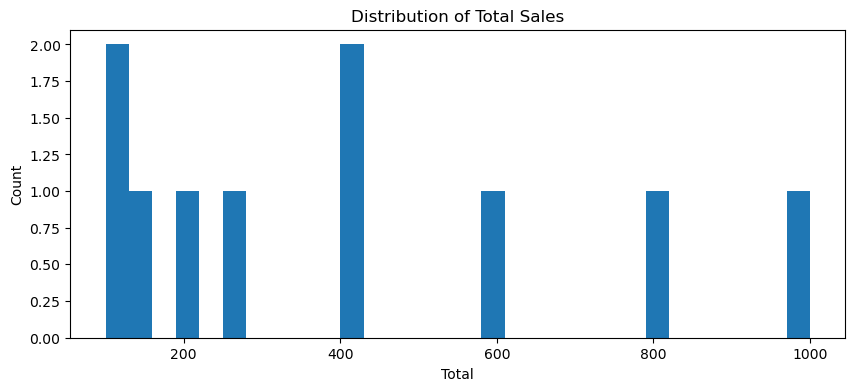

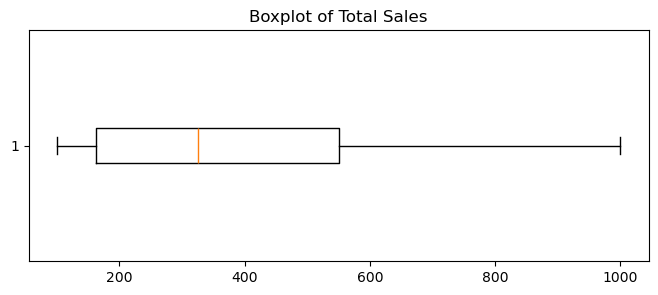

In [77]:

# Distribution: Histogram and Boxplot for 'Total'
work = df.copy()
plt.figure(figsize=(10,4))
plt.hist(work['Total'], bins=30)
plt.title('Distribution of Total Sales')
plt.xlabel('Total')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,3))
plt.boxplot(work['Total'], vert=False)
plt.title('Boxplot of Total Sales')
plt.show()

## Correlation Heatmap

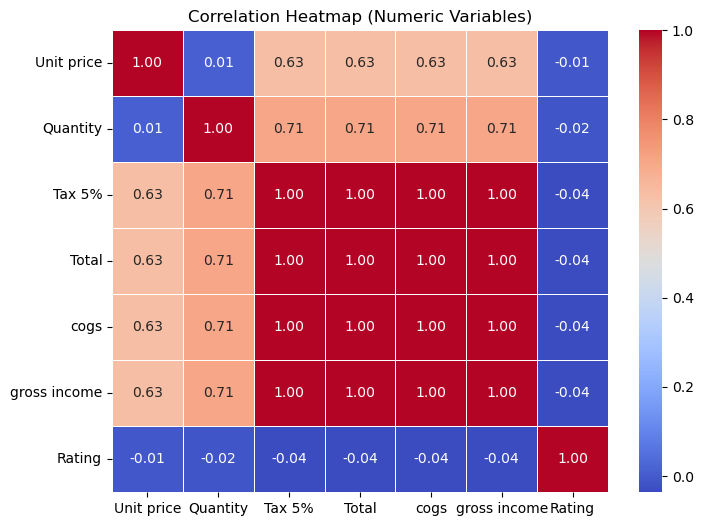

In [33]:
# Correlation matrix (numeric fields)

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


Month
January     116291.868
February     97219.374
March       109455.507
Name: Total, dtype: float64


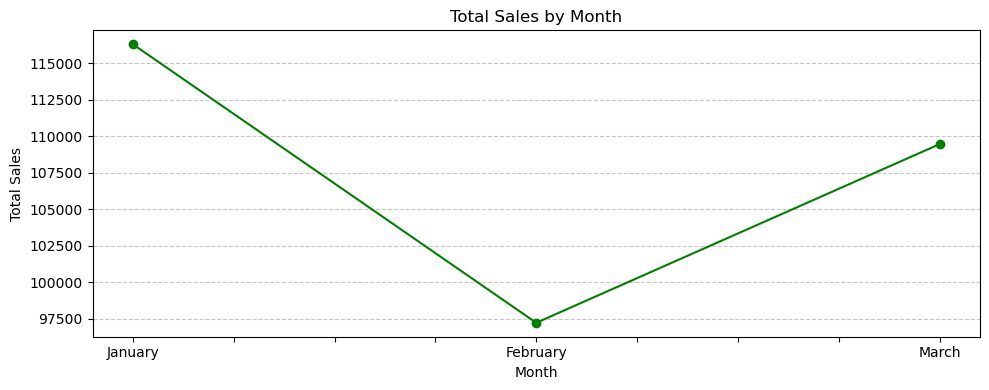

In [34]:
# Monthly trend: total sales by Month (preserve calendar order)
#Sales by Month
sales_by_month = df.groupby('Month')['Total'].sum()
sorted_sales_by_month = sales_by_month.reindex(['January', 'February', 'March'])
print(sorted_sales_by_month)

# Plot
plt.figure(figsize=(10,4))
sorted_sales_by_month.plot(kind='line', marker='o', color='green')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


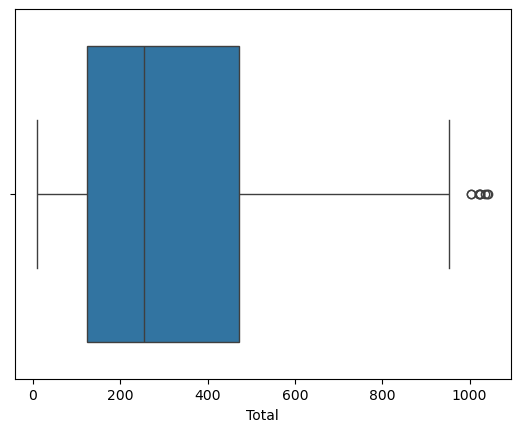

<Figure size 10x10 with 0 Axes>

<Figure size 10x10 with 0 Axes>

In [35]:
#2.Comparison Analysis
#Box Plot for  Total Sales Distribution

sns.boxplot(data=df, x='Total'); plt.show()
plt.figure(figsize=(0.1,0.1))


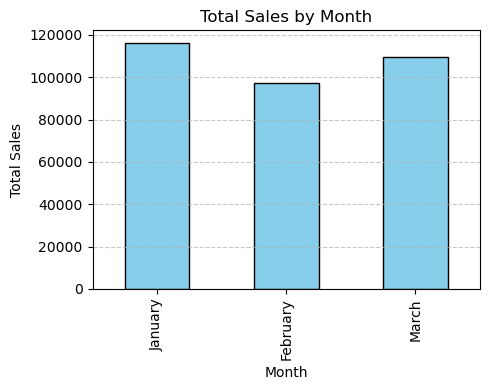

In [36]:
#Total sales Over Month
monthly_sales = df.groupby('Month')['Total'].sum()

sorted_monthly_sales = monthly_sales.reindex(
    ['January', 'February', 'March'], fill_value=0
)
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sorted_monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


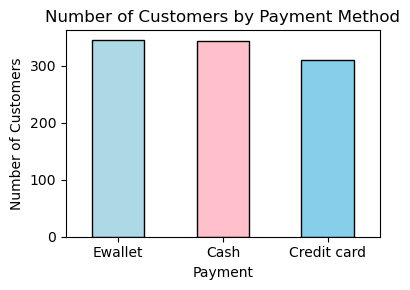

In [37]:
#Customers by Payment Method
payment_counts = df['Payment'].value_counts()

# Display the results
print(payment_counts)

plt.figure(figsize=(4, 3))
payment_counts.plot(kind='bar', color=['lightblue', 'pink', 'skyblue'], edgecolor='black')
plt.title("Number of Customers by Payment Method")
plt.xlabel("Payment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [92]:
print(df.columns.tolist())


['Total']


In [96]:
# Customer type distribution
df_raw = pd.read_csv(r"D:\Desktop\wil be done\first\supermarket_sales data set.csv")
df=df_raw.copy()

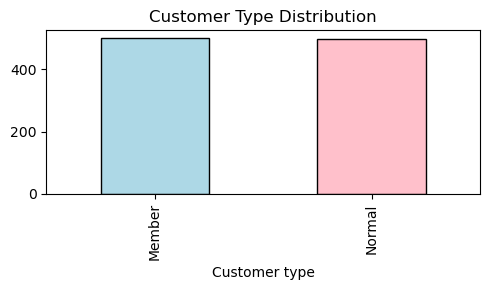

In [99]:
customer_type = df['Customer type'].value_counts()

plt.figure(figsize=(5,3))
customer_type.plot(kind='bar', color=['lightblue', 'pink', 'skyblue'], edgecolor='black')

plt.title('Customer Type Distribution')
plt.tight_layout()
plt.show()

Branch
A    340
B    332
C    328
Name: count, dtype: int64


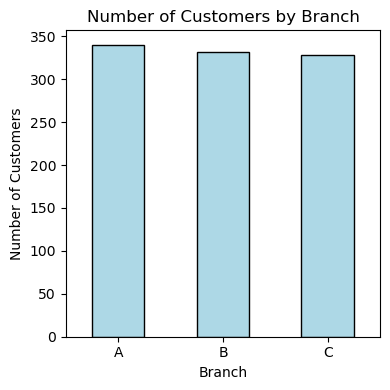

In [102]:
#Number of Customers by Branch
customer_count_by_branch = df['Branch'].value_counts()
print(customer_count_by_branch)
plt.figure(figsize=(4, 4))
customer_count_by_branch.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Number of Customers by Branch")
plt.xlabel("Branch")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


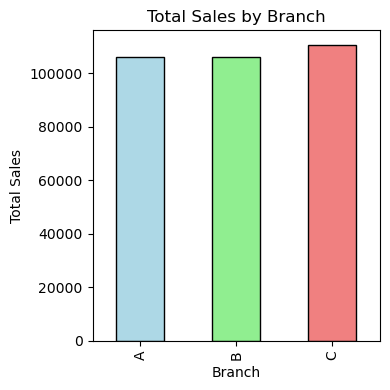

In [103]:
#Total Sales by Branch
sales_by_branch = df.groupby('Branch')['Total'].sum()

# Display the results
print(sales_by_branch)

# Optional: Visualize the results with a bar chart
plt.figure(figsize=(4, 4))
sales_by_branch.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'], edgecolor='black')
plt.title("Total Sales by Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


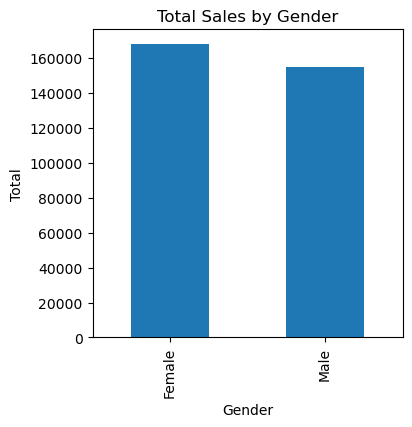

In [104]:
#Total Sales by Gender
plt.figure(figsize=(4,4))
df.groupby('Gender')['Total'].sum().plot(kind='bar', title="Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total")
plt.show()

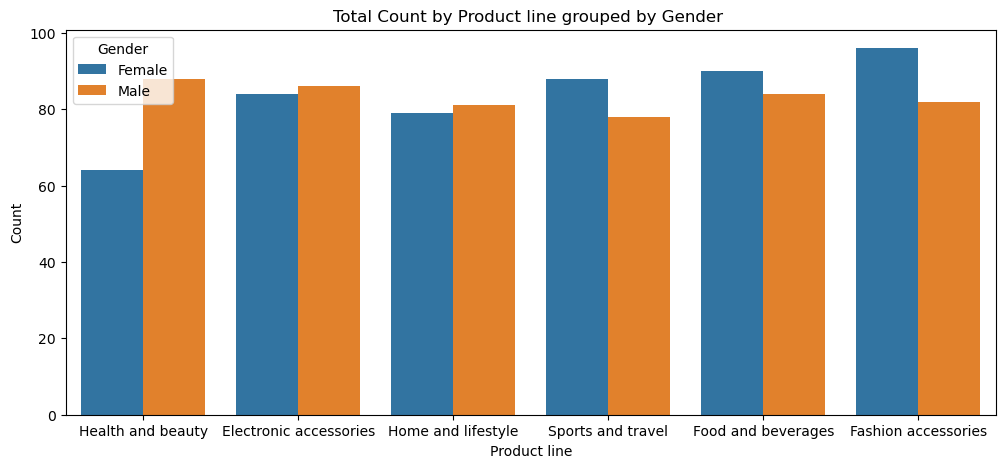

In [105]:
#Gender by Product line
plt.figure(figsize=(12, 5))
sns.countplot(x='Product line', hue='Gender', data=df)
plt.title('Total Count by Product line grouped by Gender ')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

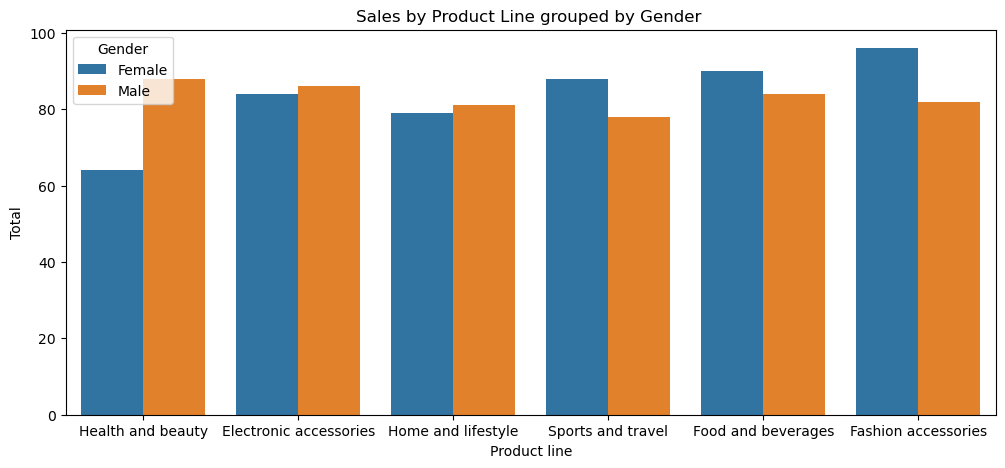

In [106]:
#Total Sales by Product line
plt.figure(figsize=(12, 5))
sns.countplot(x='Product line', hue='Gender', data=df)
plt.title('Sales by Product Line grouped by Gender ')
plt.xlabel('Product line')
plt.ylabel('Total')
plt.legend(title='Gender')
plt.show()

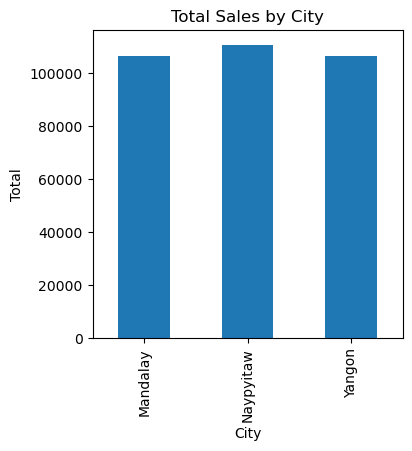

In [107]:
# Total Sales by City
plt.figure(figsize=(4,4))
df.groupby('City')['Total'].sum().plot(kind='bar', title="Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total")
plt.show()

In [108]:
#Count of customers in each city
customer_count_by_city = df['City'].value_counts()
print(customer_count_by_city)

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


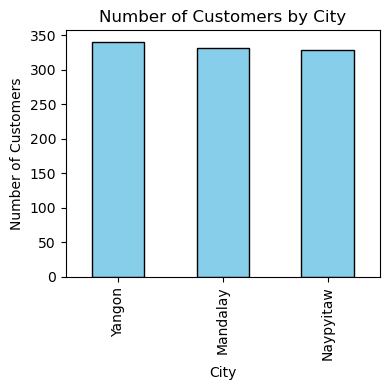

In [109]:
#Number of Customers in each city
plt.figure(figsize=(4, 4))  
customer_count_by_city.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Customers by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.tight_layout()  
plt.show()


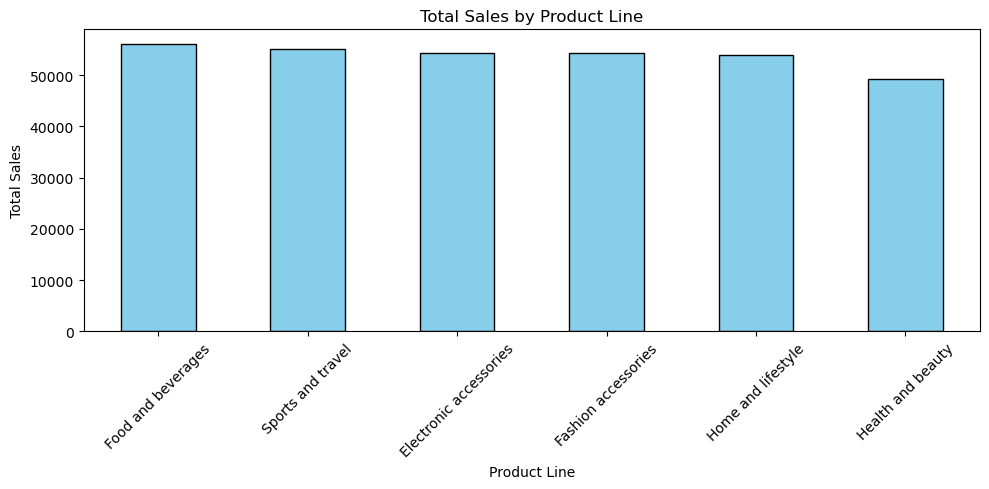

In [110]:
#Total Sales by Category
sales_by_category = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sales_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


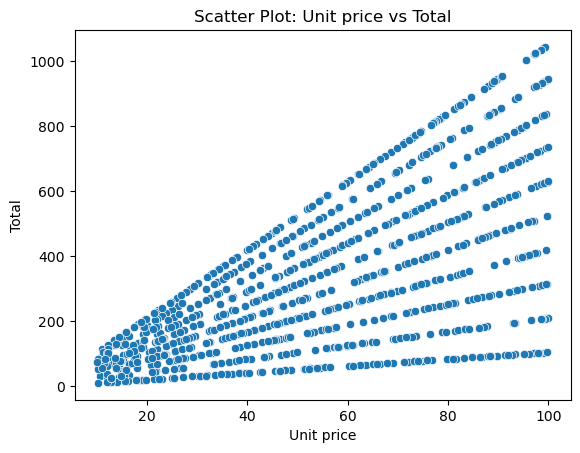

In [111]:
# 3.Corelation Analysis
#Scatter plot for 'Unit Price' vs 'Total Sales'
sns.scatterplot(data=df, x='Unit price', y='Total')

plt.title("Scatter Plot: Unit price vs Total")
plt.xlabel("Unit price")
plt.ylabel("Total")
plt.show()


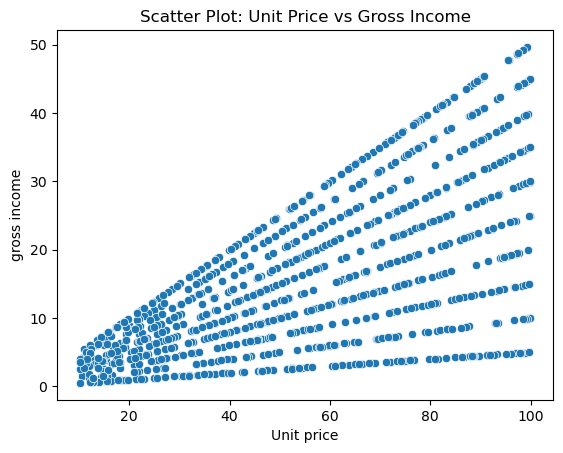

In [112]:
sns.scatterplot(data=df, x='Unit price', y='gross income')
plt.title("Scatter Plot: Unit Price vs Gross Income")
plt.xlabel("Unit price")
plt.ylabel("gross income")
plt.show()


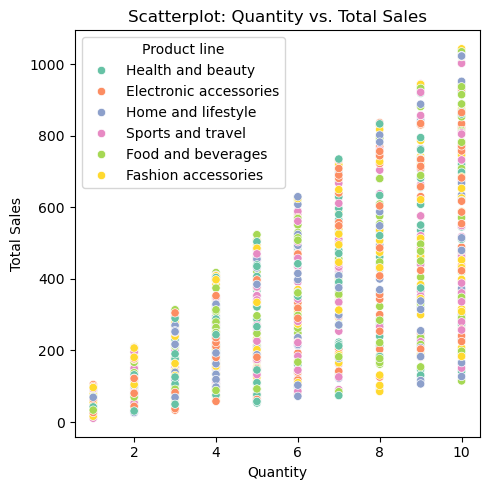

In [113]:
#Quantity vs Total Sales
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Quantity', y='Total', hue='Product line', palette='Set2')
plt.title('Scatterplot: Quantity vs. Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



Branch
A    1859
B    1820
C    1831
Name: Quantity, dtype: int64


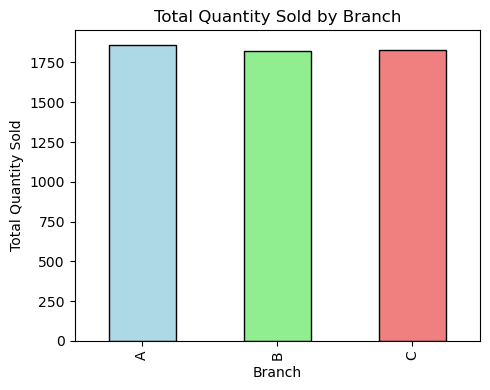

In [114]:
#Branch by Quantity

quantity_by_branch = df.groupby('Branch')['Quantity'].sum()

# Display the results
print(quantity_by_branch)

# Optional: Visualize the results with a bar chart
plt.figure(figsize=(5, 4))
quantity_by_branch.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral'], edgecolor='black')
plt.title("Total Quantity Sold by Branch")
plt.xlabel("Branch")
plt.ylabel("Total Quantity Sold")
plt.tight_layout()
plt.show()


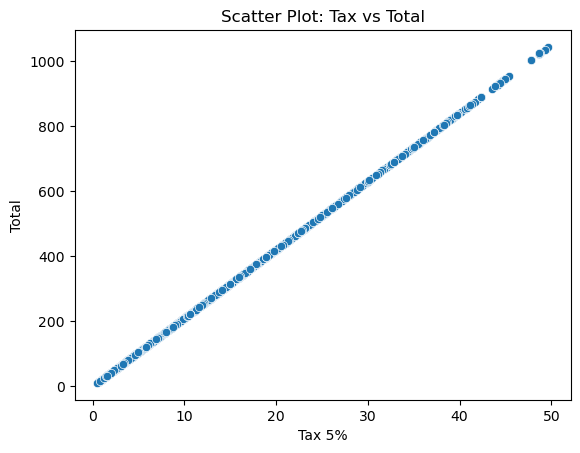

In [115]:
#Tax vs Total
sns.scatterplot(data=df, x='Tax 5%', y='Total')
plt.title("Scatter Plot: Tax vs Total")
plt.xlabel("Tax 5%")
plt.ylabel("Total")
plt.show()


In [116]:
plt.close()

<Figure size 300x400 with 0 Axes>

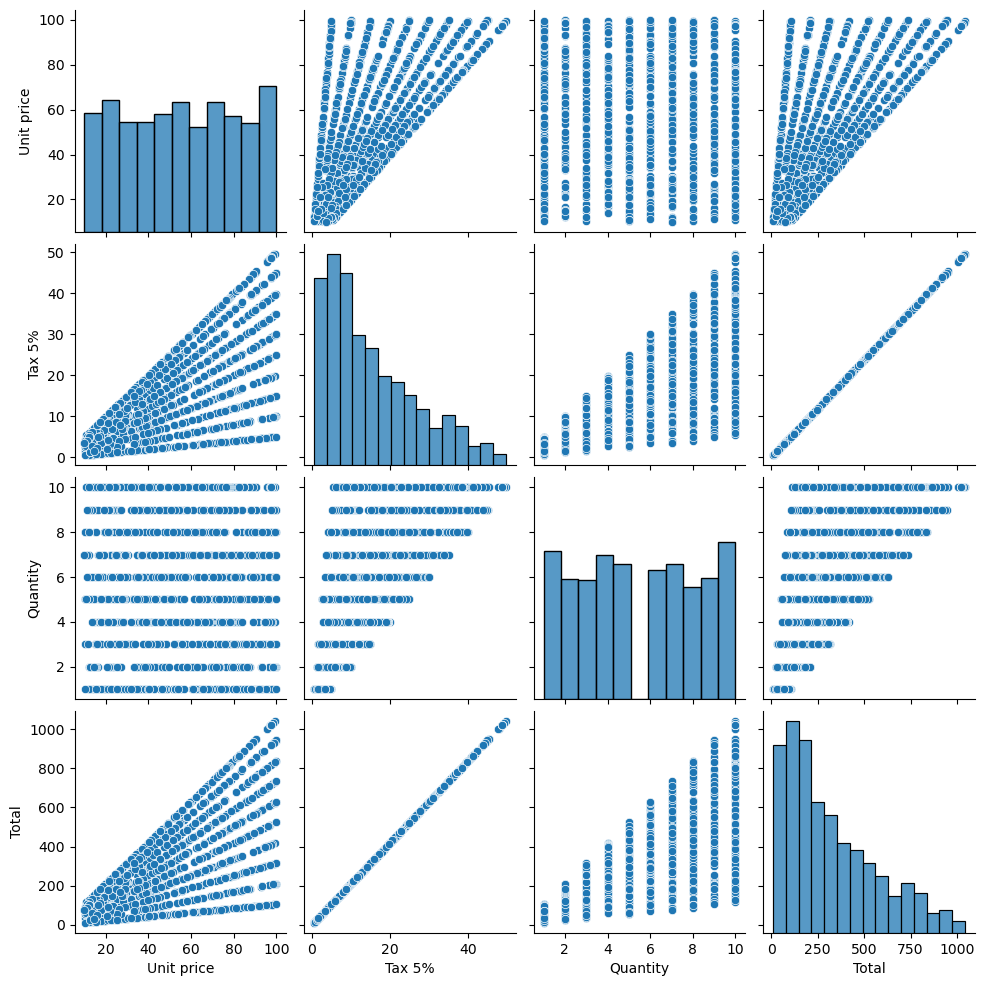

In [117]:
vars=['Unit price','Tax 5%','Quantity','Total']
plt.figure(figsize=(3,4))
df_imp=df[vars]
#Visualise pair plot
sns.pairplot(df_imp)
plt.show()


In [118]:
df.sample(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating
19,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,2019-03-11,Ewallet,80.60,4.761905,4.030,4.4
479,A,Yangon,Normal,Male,Electronic accessories,38.60,1,1.930,40.530,2019-01-29,Ewallet,38.60,4.761905,1.930,6.7
63,A,Yangon,Member,Male,Sports and travel,15.81,10,7.905,166.005,2019-03-06,Credit card,158.10,4.761905,7.905,8.6
83,C,Naypyitaw,Member,Female,Food and beverages,80.36,4,16.072,337.512,2019-02-23,Credit card,321.44,4.761905,16.072,8.3
129,B,Mandalay,Normal,Female,Sports and travel,90.28,9,40.626,853.146,2019-02-08,Ewallet,812.52,4.761905,40.626,7.2


In [119]:
#4.Outlier Detection
# Interquartile Range

data = {'Total': [150, 400, 200, 1000, 100, 400, 100]} 
data = {'Total': [125, 763, 80, 32, 316, 400, 100]} 
df = pd.DataFrame(data)

# Calculate Q1, Q3, and IQR
Q1 = df['Total'].quantile(0.25)  # First Quartile (25%)
Q3 = df['Total'].quantile(0.75)  # Third Quartile (75%)
IQR = Q3 - Q1  


# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Total'] < lower_bound) | (df['Total'] > upper_bound)]
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print("Outliers:")
print(outliers)

Lower Bound: -312.0
Upper Bound: 760.0
Outliers:
   Total
1    763


In [120]:
# To find Outliers through Z-Score

data = {'Total':[150, 400, 200, 1000, 100, 400, 100]}    
bins = [0, 200, 400, 600, 800, 1000] 
df = pd.DataFrame(data)

# Calculate mean and standard deviation
mean_total = df['Total'].mean()
std_total = df['Total'].std()

# Calculate Z-Score for each value in the 'Total' column
df['Z_Score'] = (df['Total'] - mean_total) / std_total  # Fixed variable name

# Print mean and Z-Scores
print("Mean:", mean_total)
print("Z-Scores:")
print(mean_total)


Mean: 335.7142857142857
Z-Scores:
335.7142857142857


In [121]:
print(std_total)

319.7841533939804


<Figure size 200x100 with 0 Axes>

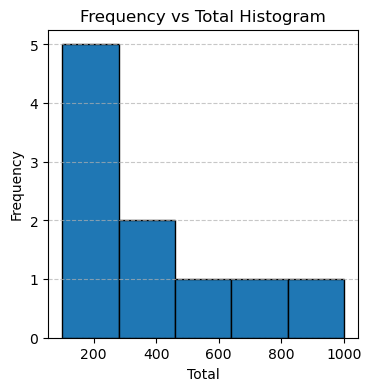

In [122]:
#5.Distribution Analysis of Total Sales
plt.figure(figsize=(2, 1)) 

# Plot the histogram 
data = {"Total": [150, 400, 200, 1000, 100, 400, 100, 250, 600, 800]}
df = pd.DataFrame(data)

# Plot the histogram
plt.figure(figsize=(4, 4))  
plt.hist(df['Total'], bins=5, edgecolor='black')  # Create histogram
plt.title("Frequency vs Total Histogram")  # Add a title
plt.xlabel("Total")  # Label for x-axis
plt.ylabel("Frequency")  # Label for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity
plt.show()


In [123]:
print(df['Total'].unique())

[ 150  400  200 1000  100  250  600  800]


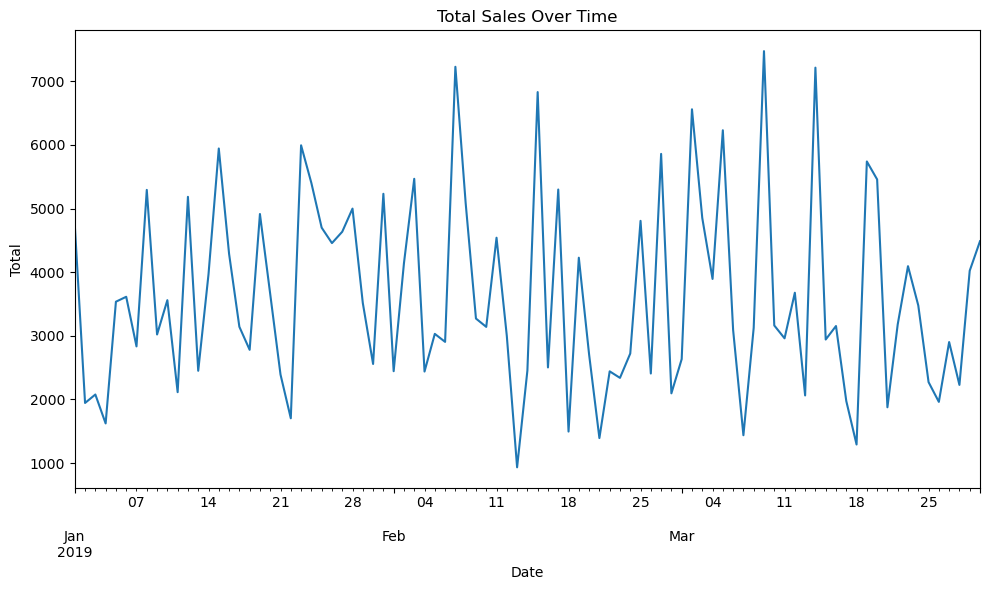

In [128]:
# 6.Diagnostic Analysis
# Sales over Time

#Read the data(csv file to python)
df_raw = pd.read_csv(r"D:\Desktop\wil be done\first\supermarket_sales data set.csv")
df=df_raw.copy()
columns_to_drop = [col for col in ['Invoice ID','Time'] if col in df.columns]
#To convert Date to Datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.drop(columns=columns_to_drop, inplace=True)

plt.figure(figsize=(10,6))
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.groupby('Date')['Total'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total')
plt.tight_layout()
plt.show()

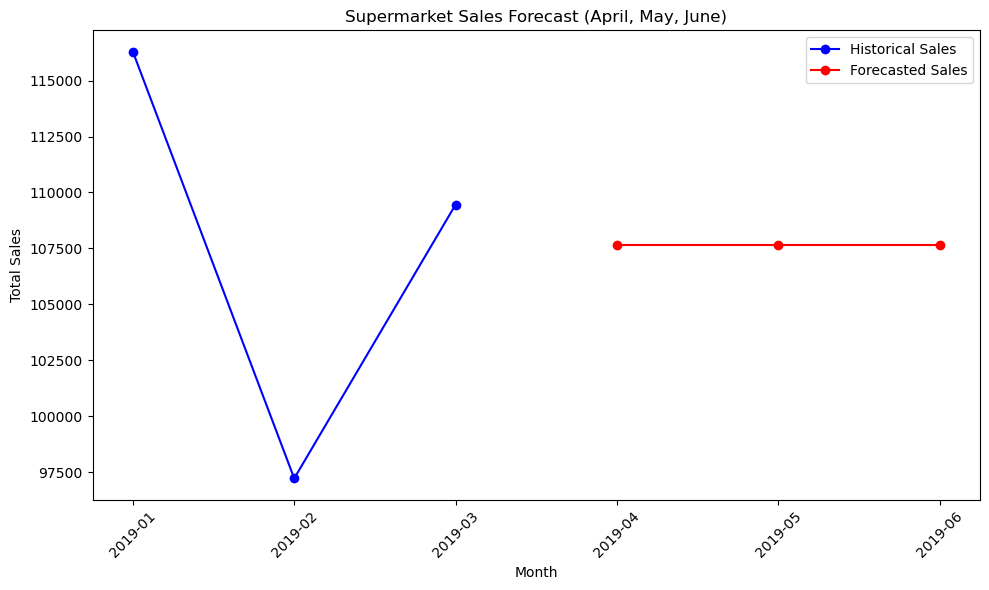

Forecasted Sales for 2019-04: 107655.58
Forecasted Sales for 2019-05: 107655.58
Forecasted Sales for 2019-06: 107655.58


In [129]:
#Forecast SALES for next 3 months
# Extract month and year as period format

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' to datetime and extract 'Month'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.to_period('M')  

# Filter data up to March
df = df[df['Month'] <= pd.Period('2019-03', freq='M')]

# Aggregate sales data by month
monthly_sales = df.groupby('Month')['Total'].sum()

# Calculate average monthly sales
average_monthly_sales = monthly_sales.mean()

# Generate forecast for the next three months (April, May, June)
forecast_months = [pd.Period('2019-04', freq='M'), pd.Period('2019-05', freq='M'), pd.Period('2019-06', freq='M')]
forecast_sales = [average_monthly_sales] * 3

# Plot historical and forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales, label='Historical Sales', marker='o', color='blue')
plt.plot([str(month) for month in forecast_months], forecast_sales, label='Forecasted Sales', marker='o', color='red')
plt.title('Supermarket Sales Forecast (April, May, June)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print forecasted values
for month, sales in zip(forecast_months, forecast_sales):
    print(f"Forecasted Sales for {month}: {sales:.2f}")

### 6.Insights and Business Recommendations

In [71]:
# Quick KPI table
kpis = {
    'Total Sales': work['Total'].sum(),
    'Average Rating': work['Rating'].mean(),
    'Total Transactions': work.shape[0],
    'Avg Revenue per Transaction': work['Total'].mean()
}
import pandas as pd
kpi_df = pd.DataFrame(list(kpis.items()), columns=['KPI','Value'])

try:
    tools.display_dataframe_to_user('Key KPIs', kpi_df)
except Exception:
    print(kpi_df.to_string(index=False))

# Compute a few textual insights
top_product = work.groupby('Product line')['Total'].sum().idxmax()
top_branch = work.groupby('Branch')['Total'].sum().idxmax()
most_used_payment = work['Payment'].value_counts().idxmax()

print('Top product line by revenue:', top_product)
print('Top branch by revenue:', top_branch)
print('Most used payment method:', most_used_payment)

print('\nBusiness Recommendations:\n')
print('- Prioritize inventory and promotions for the top product lines.')
print('- Investigate why lower-revenue branches underperform: staffing, location, or stock issues.')
print('- Promote digital payments and loyalty offers for high-value customers.')


                        KPI         Value
                Total Sales 322966.749000
             Average Rating      6.972700
         Total Transactions   1000.000000
Avg Revenue per Transaction    322.966749
Top product line by revenue: Food and beverages
Top branch by revenue: C
Most used payment method: Ewallet

Business Recommendations:

- Prioritize inventory and promotions for the top product lines.
- Investigate why lower-revenue branches underperform: staffing, location, or stock issues.
- Promote digital payments and loyalty offers for high-value customers.
